Federal University of Rio Grande do Norte

Data Science - 2020.6

Teaching intern [Andressa Stéfany](https://github.com/AndressaStefany)

# Using interactive graphics

# 1.0 Import Libraries and Dataset

In [ ]:
# Install Plotly
!pip install Plotly==4.12

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Installing the Kaggle API on Colab:

In [ ]:
! pip install --upgrade kaggle

Requirement already up-to-date: kaggle in /usr/local/lib/python3.6/dist-packages (1.5.9)


Authenticating with Kaggle using kaggle.json:

Navigate to https://www.kaggle.com. Then go to the [Account tab of your user profile](https://www.kaggle.com/me/account) and select Create API Token. This will trigger the download of kaggle.json, a file containing your API credentials.

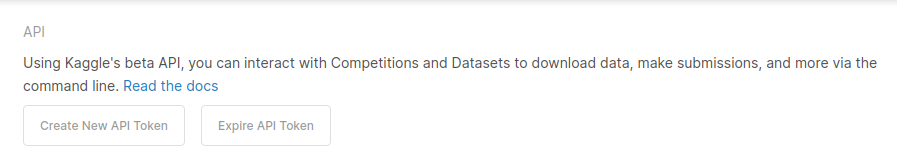

Then run the cell below to upload kaggle.json to your Colab runtime.

In [ ]:
from google.colab import files

# Then move kaggle.json into the folder where the API expects to find it.
!mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle competitions list

ref                                            deadline             category            reward  teamCount  userHasEntered  
---------------------------------------------  -------------------  ---------------  ---------  ---------  --------------  
contradictory-my-dear-watson                   2030-07-01 23:59:00  Getting Started     Prizes        134           False  
gan-getting-started                            2030-07-01 23:59:00  Getting Started     Prizes        189           False  
tpu-getting-started                            2030-06-03 23:59:00  Getting Started  Knowledge        305           False  
digit-recognizer                               2030-01-01 00:00:00  Getting Started  Knowledge       2332           False  
titanic                                        2030-01-01 00:00:00  Getting Started  Knowledge      17888            True  
house-prices-advanced-regression-techniques    2030-01-01 00:00:00  Getting Started  Knowledge       4481           False  
connectx

In [ ]:
# Download of the netflix-shows dataset
!kaggle datasets download -d shivamb/netflix-shows

  0% 0.00/971k [00:00<?, ?B/s]
100% 971k/971k [00:00<00:00, 66.6MB/s]


In [ ]:
data = pd.read_csv('netflix-shows.zip')
data.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."


# 2.0 Pre-processing and Cleaning

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6234 entries, 0 to 6233
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       6234 non-null   int64 
 1   type          6234 non-null   object
 2   title         6234 non-null   object
 3   director      4265 non-null   object
 4   cast          5664 non-null   object
 5   country       5758 non-null   object
 6   date_added    6223 non-null   object
 7   release_year  6234 non-null   int64 
 8   rating        6224 non-null   object
 9   duration      6234 non-null   object
 10  listed_in     6234 non-null   object
 11  description   6234 non-null   object
dtypes: int64(2), object(10)
memory usage: 584.6+ KB


In [ ]:
print("Null values in the dataset: \n\n{}\n".format(data.isnull().sum(axis = 0)))

Null values in the dataset: 

show_id            0
type               0
title              0
director        1969
cast             570
country          476
date_added        11
release_year       0
rating            10
duration           0
listed_in          0
description        0
dtype: int64



# 3.0 Matplotlib

Create the graph "Movies and TV Shows":

In [ ]:
plt.style.use("fivethirtyeight")

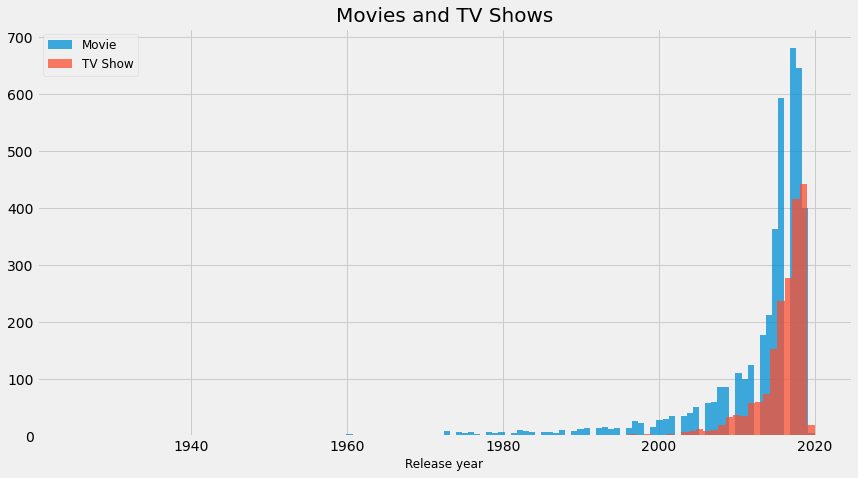

In [ ]:
# Create the plot for the histograms
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(13, 7))

# Create the histograms
ax.hist(data[data['type'] == 'Movie'].release_year,bins=100, alpha = 0.75)
ax.hist(data[data['type'] == 'TV Show'].release_year,bins=100, alpha = 0.75)

# Add labels and title
plt.title("Movies and TV Shows", fontsize=20)
plt.legend(data['type'].unique(), fontsize=12)
plt.xlabel('Release year', fontsize=12)

plt.show()

# 4.0 Plotly

Importing the modules of Plotly Express

In [ ]:
import plotly.express as px

## Histogram

In [ ]:
fig = px.histogram(data, 
                   x='release_year',
                   color='type', 
                   opacity=0.75,
                   nbins=100,
                   title='Movies and TV Shows',
                   labels={'release_year':'Release year'})

# Overlay both histograms
fig.update_layout(barmode='overlay',
                  title_font_size=30)

fig.show()

## Line graph

Plot the graph release of year on x and accumulated count of Movies and TV Shows on y.

In [ ]:
data.head(1)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...


We can to makes this using `groupby()` of Pandas to group of columns `type` and `release_year`. After, we'll use the `count()` function and `cumsum()` to obtain the accumulated count of Movies and TV Shows.

In [ ]:
data_line = data[['type','release_year','show_id']].groupby(['type','release_year']).count()
data_line

show_id
type    release_year         
Movie   1942                2
        1943                3
        1944                3
        1945                3
        1946                2
...                       ...
TV Show 2016              237
        2017              277
        2018              417
        2019              443
        2020               19

[115 rows x 1 columns]

In [ ]:
# Modify multi-index to columns
data_line.reset_index(level=['type','release_year'],inplace=True)
data_line.rename(columns={'show_id': 'Count'}, inplace=True)
data_line

,type,release_year,Count
0,Movie,1942,2
1,Movie,1943,3
2,Movie,1944,3
3,Movie,1945,3
4,Movie,1946,2
...,...,...,...
110,TV Show,2016,237
111,TV Show,2017,277
112,TV Show,2018,417
113,TV Show,2019,443


In [ ]:
# Obtaining the accumulated sum
movie = data_line[data_line['type']=='Movie'].Count.cumsum()
tv_show = data_line[data_line['type']=='TV Show'].Count.cumsum()

data_line['cum_sum'] = pd.concat([movie,tv_show])
data_line

,type,release_year,Count,cum_sum
0,Movie,1942,2,2
1,Movie,1943,3,5
2,Movie,1944,3,8
3,Movie,1945,3,11
4,Movie,1946,2,13
...,...,...,...,...
110,TV Show,2016,237,813
111,TV Show,2017,277,1090
112,TV Show,2018,417,1507
113,TV Show,2019,443,1950


In [ ]:
# Plot line graph here
fig = px.line(x=data_line['release_year'],
              y=data_line['cum_sum'],
              color=data_line['type'],
              title='Movies and TV Shows')
fig.show()

## Bar graph

The idea is plot the graph with quantity of movies and tv show by countries. But, we need to know the names of the countries:

In [ ]:
def get_countries(array):
    return_ = np.array([])
    for word in array:
        return_ = np.append(return_,word.split(','))
    return np.unique(np.char.strip(return_))[1:]

countries_array = data[data.country.notnull()].country.unique()
countries = np.apply_along_axis(get_countries, 0, countries_array)
countries

array(['Afghanistan', 'Albania', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bangladesh', 'Belgium', 'Bermuda',
       'Botswana', 'Brazil', 'Bulgaria', 'Cambodia', 'Canada',
       'Cayman Islands', 'Chile', 'China', 'Colombia', 'Croatia', 'Cuba',
       'Cyprus', 'Czech Republic', 'Denmark', 'Dominican Republic',
       'East Germany', 'Ecuador', 'Egypt', 'Finland', 'France', 'Georgia',
       'Germany', 'Ghana', 'Greece', 'Guatemala', 'Hong Kong', 'Hungary',
       'Iceland', 'India', 'Indonesia', 'Iran', 'Iraq', 'Ireland',
       'Israel', 'Italy', 'Japan', 'Jordan', 'Kazakhstan', 'Kenya',
       'Kuwait', 'Latvia', 'Lebanon', 'Liechtenstein', 'Luxembourg',
       'Malawi', 'Malaysia', 'Malta', 'Mauritius', 'Mexico', 'Mongolia',
       'Montenegro', 'Morocco', 'Namibia', 'Nepal', 'Netherlands',
       'New Zealand', 'Nicaragua', 'Nigeria', 'Norway', 'Pakistan',
       'Panama', 'Paraguay', 'Peru', 'Philippines', 'Poland', 'Portugal',
       'Qatar', 'Roman

Then, we need to group the data by type, country and release of year:

In [ ]:
df = data[['type','country','release_year','show_id']].groupby(['type','country','release_year']).count()
df.head()

show_id
type  country   release_year         
Movie Argentina 1985                1
                1998                1
                2006                1
                2007                1
                2015                2

In [ ]:
# transforms multi-index in columns
df.reset_index(level=['type','country','release_year'],inplace=True)
df.rename(columns={'show_id':'Count'}, inplace=True)

df.head()

,type,country,release_year,Count
0,Movie,Argentina,1985,1
1,Movie,Argentina,1998,1
2,Movie,Argentina,2006,1
3,Movie,Argentina,2007,1
4,Movie,Argentina,2015,2


In [ ]:
# Bar graph here
fig = px.bar(df[df.country.isin(countries)], 
             x="country", 
             y="Count", 
             color="type", 
            #  barmode="group",
             barmode="overlay",
             title="Number of Movies and TV Shows by Country")

fig.update_layout(title_font_size=30)

fig.show()

## Box

The idea is box plot for United States, United Kingdom,India and Brazil countries.

In [ ]:
data.head()

In [ ]:
fig = px.box(data[data.country.isin(['United States', 'United Kingdom','India', 'Brazil'])], 
             x="country", 
             y="release_year",
             color="type")
fig.show()

## Violin

Plot the distribution of dataset by release of the years and type.

In [ ]:
fig = px.violin(data,
                y="release_year",
                box=True,
                color="type",
                points='all')
fig.show()

## Scatter and Marginal Plot

In [ ]:
fig = px.scatter(data[data.country.isin(countries)], 
                 y="country", 
                 x="release_year", 
                 color="type",
                 marginal_y="histogram",
                 marginal_x="rug")
fig.show()

## Coordinate and Categories Parallel

In [ ]:
df = px.data.iris()
fig = px.parallel_coordinates(df, color="species_id",
                              dimensions=['sepal_width', 
                                          'sepal_length', 
                                          'petal_width',
                                          'petal_length'],
                              color_continuous_scale=px.colors.diverging.Tealrose,
                              color_continuous_midpoint=2)
fig.show()

In [ ]:
df = px.data.tips()
fig = px.parallel_categories(df, 
                             dimensions=['sex', 'smoker', 'day'],
                             color="size", 
                             color_continuous_scale=px.colors.sequential.Inferno,
                             labels={'sex':'Payer sex', 
                                     'smoker':'Smokers at the table', 
                                     'day':'Day of week'})
fig.show()

# Reference

* [Notebook: How to use the Kaggle API from Colab](https://colab.research.google.com/github/corrieann/kaggle/blob/master/kaggle_api_in_colab.ipynb#scrollTo=Oqt7Yfi5aQuM)
*   Dataset: [Netflix Movies and TV Shows](https://www.kaggle.com/shivamb/netflix-shows)
*   [Plotly](https://plotly.com/python/plotly-fundamentals/)
*   [Plotly Express](https://plotly.com/python/plotly-express/)
*   [Marginal plots](https://plotly.com/python/marginal-plots/)
